In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Emplearemos un conjunto de datos sencillo, altura y edad de los alumnos en clase. ¿Podemos derivar uno del otro?

$$

altura = \beta_1 edad + \beta_0

$$

In [83]:
lista_alumnos = [("Leonardo S", 24, 1.82), 
                 ("Piero T", 25, 1.71), 
                 ("Marta B", 35, 1.66), 
                 ("Silvia P", 37, 1.63), 
                 ("Faro Z", 29, 1.90), 
                 ("Miguel N", 27, 1.80), 
                 ("Alejandro M", 28, 1.70), 
                 ("Cristina M", 32, 1.60), 
                 ("Francisco P", 36, 1.74), 
                 ("Jorge D", 45, 1.72), 
                 ("Jesús L", 41, 1.65), 
                 ("Marta G", 30, 1.65), 
                 ("Jennifer S", 40, 1.60), 
                 ("Diego I", 39, 1.80), 
                 ("Antonio C", 23, 1.77), 
                 ("Juan M", 32, 1.75), 
                 ("David S", 27, 1.70), 
                 ("Antonio J", 34, 1.80), 
                 ("Carlos H", 27, 1.77), 
                 ("Erik U", 28, 1.70), 
                 ("Marcos L", 35, 1.80)] 

# Ejercicio 1.

Obten un dataframe de los datos indicados.

In [84]:
df = pd.DataFrame(lista_alumnos, columns=['Name', 'Age', 'Height'])

In [85]:
df.head()

,Name,Age,Height
0,Leonardo S,24,1.82
1,Piero T,25,1.71
2,Marta B,35,1.66
3,Silvia P,37,1.63
4,Faro Z,29,1.90


# Ejercicio 2

Realiza una descripción de las distribuciones de las variables.

In [86]:
df.describe()

,Age,Height
count,21.000000,21.000000
mean,32.095238,1.727143
std,6.081980,0.079003
min,23.000000,1.600000
25%,27.000000,1.660000
50%,32.000000,1.720000
75%,36.000000,1.800000
max,45.000000,1.900000


In [87]:
import seaborn as sns


corr = df.corr(numeric_only=True)
corr


,Age,Height
Age,1.000000,-0.329275
Height,-0.329275,1.000000


<Axes: >

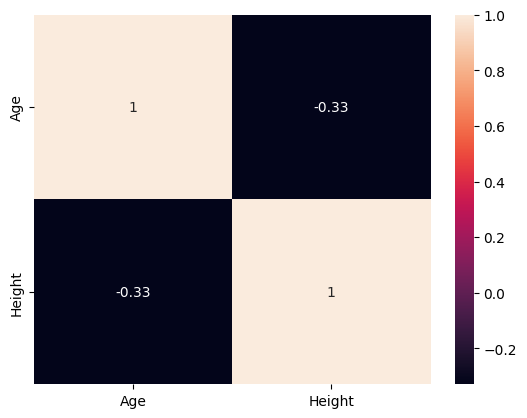

In [88]:
sns.heatmap(corr, annot=True)

# Ejercicio 3

Divide el conjunto de datos en _train_ y _test_

In [89]:
from sklearn.model_selection import train_test_split

X = df['Age'].values.reshape(-1,1)
y = df['Height'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [90]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (21, 1)
Train features shape: (14, 1)
Train target shape: (14,)
Test features shape: (7, 1)
Test target shape: (7,)


# Ejercicio 4

Entrena un modelo de regresión lineal

In [91]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

# Ejercicio 5

Analiza los coeficientes.

In [92]:
print(lm.coef_)

[-0.00414006]


In [93]:
print(lm.intercept_)

1.8520906282183314


In [94]:
X_test

array([[24],
       [34],
       [32],
       [25],
       [36],
       [27],
       [30]])

In [95]:
predictions = lm.predict(X_test)
predictions

array([1.75272915, 1.71132853, 1.71960865, 1.74858908, 1.7030484 ,
       1.74030896, 1.72788877])

# Ejercicio 6

Evalúa visualmente el modelo.

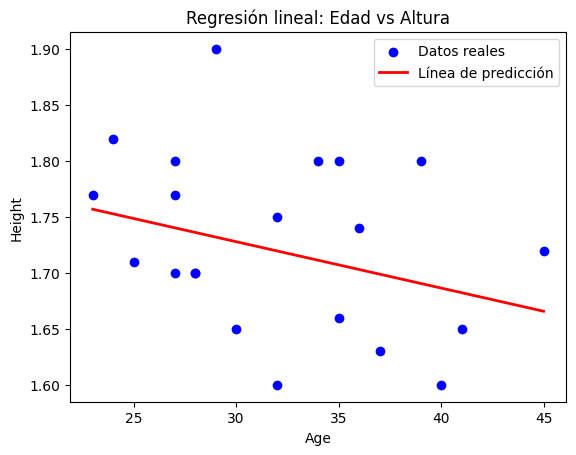

In [109]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['Age'], df['Height'], color='blue', label='Datos reales')
X_sorted = np.sort(df['Age'].values).reshape(-1, 1)
y_pred_line = lm.predict(X_sorted)
plt.plot(X_sorted, y_pred_line, color='red', linewidth=2, label='Línea de predicción')
plt.xlabel('Age')
plt.ylabel('Height')
plt.title('Regresión lineal: Edad vs Altura')
plt.legend()
plt.show()



# Ejercicio 7

Obtén las métricas de error relevantes para este modelo.

In [110]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.05706488156539665
MSE: 0.0036851216240520687
RMSE: 0.060705202611078306
